In [9]:
# Install all dependencies if not already present
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install ipywidgets

In [11]:
# Import all relevant packages
%matplotlib inline
import pandas as pd
import numpy as np
import json
import math
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from scipy.spatial import distance
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import ipywidgets as widgets

from IPython.display import Image
from IPython.display import display, HTML

In [13]:
# Tell Jupyter where the data is
data_dir = './data/CORD-19-research-challenge'

In [15]:
# Import data into a pandas DataFrame
df = pd.read_csv(f'{data_dir}/metadata.csv')
doc_paths = glob.glob(f'{data_dir}/*/*/*.json')
df.sha.fillna("", inplace=True)

# Get the text from the articles
def get_text(sha):
    if sha == "":
        return ""
    
    document_path = [x for x in doc_paths if sha in x]
    if not document_path:
        return ""
    
    with open(document_path[0]) as f:
        file = json.load(f)
        full_text = []
        
        # Get the abstract and body from the article
        for part in ['abstract', 'body_text']:
            # Get every paragraph of each abstract and body
            for text_part in file[part]:
                text = text_part['text']
                # If paragraphs are cited, remove citations
                for citation in text_part['cite_spans']:
                    text = text.replace(citation['text'], '')
                full_text.append(text)
                
        return str.join(' ', full_text)

# Time the endeavour
%time df['text'] = df.apply(lambda x: get_text(x.sha), axis=1)

CPU times: user 2min 13s, sys: 2.66 s, total: 2min 15s
Wall time: 2min 15s


In [18]:
# Preprocess the data, so it gets easier to work with
analyzer = CountVectorizer().build_analyzer()
stemmer = SnowballStemmer('english')

# Function that converts full docs to lower case
def preprocess(doc):
    doc = doc.lower()
    return str.join(" ", [stemmer.stem(w) for w in analyzer(doc)])

def preprocess_row(row):
    text = str.join(' ', [str(row.title), str(row.abstract), str(row.text)])
    return preprocess(text)

# Time the endeavour
%time df['preprocessed'] = df.apply(lambda x: preprocess_row(x), axis=1)


CPU times: user 33min 19s, sys: 2.6 s, total: 33min 22s
Wall time: 33min 23s


In [20]:
# Calculate how many times each word is present in the articles 
# and create a wordcloud from the result

cv = CountVectorizer(max_df=0.95, stop_words='english')
%time word_count = cv.fit_transform(df.preprocessed)
tfidf_tr = TfidfTransformer(smooth_idf=True, use_idf=True)
%time tfidf_tr.fit(word_count)

CPU times: user 1min 34s, sys: 765 ms, total: 1min 35s
Wall time: 1min 35s
CPU times: user 178 ms, sys: 11.1 ms, total: 189 ms
Wall time: 190 ms


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

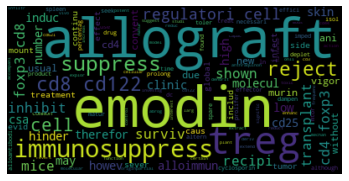

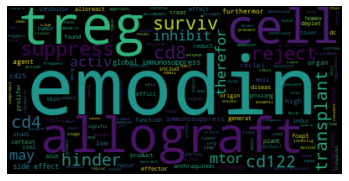

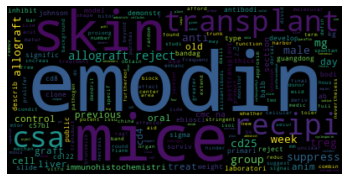

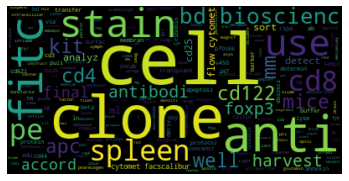

In [ ]:
result = ''
for text in df['preprocessed']:
    result = ''.join(text)

import math

divide = math.floor(len(result)/10)



def create_word_cloud(name, text):
    wordcloud = WordCloud().generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Save the image in the img folder:
    wordcloud.to_file("img/" + name + ".png")


create_word_cloud("1", result[0:divide])
create_word_cloud("2", result[divide:divide*2])
create_word_cloud("3", result[divide*2:divide*3])
create_word_cloud("4", result[divide*3:divide*4])
create_word_cloud("5", result[divide*4:divide*5])
create_word_cloud("6", result[divide*5:divide*6])
create_word_cloud("7", result[divide*6:divide*7])
create_word_cloud("8", result[divide*7:divide*8])
create_word_cloud("9", result[divide*8:divide*9])
create_word_cloud("10", result[divide*9:len(result)-1])




In [61]:
len(result)/4

7407.25